In [1]:
# Importando os módulos que serão utilizados

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import time
import dill
import pandas as pd
import plotly.express as ply_exp
import plotly.graph_objects as ply_go

# Configurando o acesso do tensorflow aos processadores do computador
# no caso, está sendo selecionada a primeira placa de vídeo listada

# gpus = tf.config.experimental.list_physical_devices('GPU') # Listando as placas de vídeo
# tf.config.experimental.set_memory_growth(gpus[0], True)    # Selecionando a primeira GPU e configurando

# Importando os módulos contendo as funções criadas no projeto

from aux_func_V3 import *
import API_Numpy
import API_TensorFlow

In [2]:
def teste_cp(n_cp, Δx):
    f = lambda x: (x**(n_cp+1))*np.exp(0.75*x)
#     f = lambda x: np.exp(-20*x**2)
#     f = lambda x: np.sin(np.pi*x) #-0.5*x**3 + np.where(x > 0, 1, 0)
    x = np.arange(-1-3*Δx, 1+3*Δx, Δx, dtype = dtype)
    
    return f(x)

def ref_cp(n_cp, Δx):
    df = lambda x: (n_cp+1)*(x**n_cp)*np.exp(0.75*x) + 0.75*(x**(n_cp+1))*np.exp(0.75*x)
#     df = lambda x: -40*x*np.exp(-20*x**2)
#     df = lambda x: np.pi*np.cos(np.pi*x) #-1.5*x**2
    x  = np.arange(-1-3*Δx, 1+3*Δx, Δx, dtype = dtype)
    
    return df(x)

In [3]:
# nomes = [
#     "WENO-JS", "WENO-JS (M)", "WENO-JS (MS)", "WENO-JS (BI)",
#     "WENO-Z" , "WENO-Z (M)" , "WENO-Z (MS)" , "WENO-Z (BI)" , 
#     "WENO-Z+", "WENO-Z+ (M)", "WENO-Z+ (MS)", "WENO-Z+ (BI)",
#     "WENO-ZC (M)", "WENO-ZC (MS)", "WENO-ZC (BI)"
# ]

# Ordem de convergência para os métodos clássicos
# nomes = [
#     "WENO-JS", "WENO-JS (M)", "WENO-Z"
# ]

# API      = API_Numpy
# equation = diff_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = WENO_JS(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 1]] = WENO_JS_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 2]] = WENO_JS_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 3]] = WENO_JS_BI(API, equation, γ=γ).DerivadaEspacial

# WENOs[nomes[ 4]] = WENO_Z(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 5]] = WENO_Z_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 6]] = WENO_Z_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 7]] = WENO_Z_BI(API, equation, γ=γ).DerivadaEspacial

# WENOs[nomes[ 8]] = WENO_Zp(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 9]] = WENO_Zp_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[10]] = WENO_Zp_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[11]] = WENO_Zp_BI(API, equation, γ=γ).DerivadaEspacial

# WENOs[nomes[12]] = WENO_ZC_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[13]] = WENO_ZC_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[14]] = WENO_ZC_BI(API, equation, γ=γ).DerivadaEspacial

# Ordem de convergência para os métodos clássicos
# WENOs[nomes[ 0]] = WENO_JS(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 1]] = WENO_JS_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 2]] = WENO_Z(    API, equation, γ=γ).DerivadaEspacial


#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# nomes = [
#     "WENO-JS", "WENO-JS (MS)", "WENO-JS (BI)", "WENO-JS (BI2)",
#     "WENO-Z" , "WENO-Z (MS)" , "WENO-Z (BI)" , "WENO-Z (BI2)" ,
#     "WENO-Z+", "WENO-ZC (MS)", "WENO-ZC (BI)", "WENO-ZC (BI2)",
#     "WENO-D" , "WENO-D (MS)" , "WENO-D (BI)" , "WENO-D (BI2)" ,
#     "WENO-A" , "WENO-A (MS)" , "WENO-A (BI)" , "WENO-A (BI2)" 
# ]

# API      = API_Numpy
# equation = diff_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 1]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 2]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 3]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

# WENOs[nomes[ 4]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 5]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 6]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 7]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

# WENOs[nomes[ 8]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[ 9]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[10]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[11]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

# WENOs[nomes[12]] = simulation(API, equation, WENO_D_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[13]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[14]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[15]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

# WENOs[nomes[16]] = simulation(API, equation, WENO_A_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[17]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[18]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[19]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------
# nomes = ["WENO-JS", "WENO-Z", "WENO-Z+", "WENO-ZD", "WENO-ZD+", "WENO-D", "WENO-Z (MS)", "WENO-Switch"]

# API      = API_Numpy
# equation = diff_equation
# γ        = 1.4

# WENOs = {}
# WENOs[nomes[0]] = simulation(API, equation, WENO_JS_scheme    , γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[1]] = simulation(API, equation, WENO_Z_scheme     , γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[2]] = simulation(API, equation, WENO_Zp_scheme    , γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[3]] = simulation(API, equation, WENO_ZD_scheme    , γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[4]] = simulation(API, equation, WENO_ZDp_scheme   , γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[5]] = simulation(API, equation, WENO_D_scheme     , γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[6]] = simulation(API, equation, WENO_Z_scheme     , γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
# WENOs[nomes[7]] = simulation(API, equation, WENO_Switch_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------------------------
nomes = ["WENO-Z" , "WENO-Z+", "WENO-ZD+", "WENO-ZD", "WENO-D", "WENO-Sym"]

cores = {}
cores[nomes[0]] = "#4262C1" # WENO-Z   : Azul
cores[nomes[1]] = "#C23C52" # WENO-Z+  : Vermelho
cores[nomes[2]] = "#57933B" # WENO-ZD+ : Verde
cores[nomes[3]] = "#C2881D" # WENO-ZD  : Dourado
cores[nomes[4]] = "#A23CB1" # WENO-D   : Roxo
cores[nomes[5]] = "#C2881D" # WENO-Sym : Dourado

API      = API_Numpy
equation = diff_equation
γ        = 1.4

WENOs = {}
WENOs[nomes[0]] = simulation(API, equation, WENO_Z_scheme    , γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[1]] = simulation(API, equation, WENO_Zp_scheme   , γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[2]] = simulation(API, equation, WENO_ZDp_4_scheme, γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[3]] = simulation(API, equation, WENO_ZD_2_scheme , γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[4]] = simulation(API, equation, WENO_D_scheme    , γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[5]] = simulation(API, equation, WENO_Sym_scheme  , γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default).DerivadaEspacial
#---------------------------------------------------------------------------------------------------------------------------------------------------------------


# nomes = ["Linear"]

# API      = API_Numpy
# equation = diff_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = simulation(API, equation, WENO_linear_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial


In [14]:
# base = 0.5
# Δxs  = 2/20*base**np.arange(0, 10+1)
# Δxs  = 2/160*base**np.arange(0, 10+1)
# malha = [2/160, 2/320, 2/640, 2/1280, 2/2560, 2/5120, 2/10240, 2/20480]

# Δxs  = [2/180, 2/200, 2/220, 2/240, 2/260, 2/280, 2/300]
Δxs  = [2/60, 2/80, 2/100, 2/120, 2/140, 2/160, 2/180]
N    = [  60,   80,   100,   120,   140,   160,   180]
base = np.zeros([len(Δxs)-1])
for i in np.arange(len(base)):
    base[i] = Δxs[i+1]/Δxs[i]

fronteira = FronteiraFixa
n_cp = 0

testes    = {}
derivadas = {}
erros     = {}
for nome in nomes:
    
    resultados = []
    derivada   = []
    erro       = []
    for i in np.arange(len(Δxs)):
        u     = teste_cp(n_cp, Δxs[i])
        u_hat = WENOs[nome](u, Δxs[i], fronteira, t=None)
        dif   = u_hat - ref_cp(n_cp, Δxs[i])
        
#         resultados.append(np.max(np.abs(dif[3:-3])))                # norma L-inf
        resultados.append(np.sqrt(np.sum(np.square(dif[3:-3]))/N[i])) # norma L2     ???
#         resultados.append((np.sum(np.abs(dif[3:-3])))               # norma L1
        
        derivada.append(u_hat)
        erro.append(dif[3:-3])
        
    testes[nome]    = resultados
    derivadas[nome] = derivada
    erros[nome]     = erro

In [15]:
testes

{'WENO-Z': [1.5041065489796648e-11,
  2.678612958853671e-12,
  7.065577211949782e-13,
  2.3057268501401876e-13,
  8.994531744399942e-14,
  3.7427067663069785e-14,
  1.8301619571924504e-14],
 'WENO-Z+': [1.9429413635259426e-10,
  3.840895446114616e-11,
  1.0471380350968621e-11,
  3.5699596927217385e-12,
  1.428813648034325e-12,
  6.447343321710964e-13,
  3.195135214586819e-13],
 'WENO-ZD+': [1.0965969733777654e-10,
  2.021089067697299e-11,
  5.352991133234911e-12,
  1.7990108860250919e-12,
  7.141186943705608e-13,
  3.2108697611248686e-13,
  1.5896097477151864e-13],
 'WENO-ZD': [1.503645724430776e-11,
  2.6784604603963918e-12,
  7.065509633771681e-13,
  2.3053831832223184e-13,
  8.957698844104481e-14,
  3.720704118398273e-14,
  1.7924447679160745e-14],
 'WENO-D': [1.503643703463678e-11,
  2.678464705626646e-12,
  7.069599990248398e-13,
  2.305848236669384e-13,
  8.963254905416711e-14,
  3.737886865447532e-14,
  1.7862956960409668e-14],
 'WENO-Sym': [1.4957182611978717e-11,
  2.668148331

In [16]:
ordem = {}
for nome in nomes:
    l_dif  = np.zeros(len(base))
    for i in np.arange(len(base)):
        l_dif[i] = np.log(testes[nome][i+1])/np.log(base[i])-np.log(testes[nome][i])/np.log(base[i])
    ordem[nome] = l_dif

In [17]:
ordem

{'WENO-Z': array([5.9978887 , 5.97216222, 6.14210831, 6.10677973, 6.56630405,
        6.07391901]),
 'WENO-Z+': array([5.63497941, 5.8242542 , 5.90216302, 5.94035539, 5.95935834,
        5.96044028]),
 'WENO-ZD+': array([5.87857385, 5.95386288, 5.98074363, 5.99376596, 5.98613653,
        5.96905408]),
 'WENO-ZD': array([5.99702146, 5.97194994, 6.14287342, 6.13243242, 6.57972947,
        6.20065908]),
 'WENO-D': array([5.99701127, 5.96936342, 6.14494146, 6.12971847, 6.54986795,
        6.26895381]),
 'WENO-Sym': array([5.99205536, 5.95996476, 6.14049708, 6.12293146, 6.43928222,
        5.94556003])}

In [9]:
# aux_nome = "WENO-Z"

# aux_x = Δxs
# aux_y = erros[aux_nome]

# # x     = tf.range(-1-3*aux_x[0], 1+3*aux_x[0], aux_x[0], dtype = dtype)
# # y     = aux_y[0]
# # label = tf.repeat([2/Δxs[0]], [len(aux_y[0])])

# # for i in tf.range(1, len(aux_x)):
# #     x = tf.concat([x, tf.range(-1-3*aux_x[i], 1+3*aux_x[i], aux_x[i], dtype = dtype)], axis = 0)
# #     y = tf.concat([y, aux_y[i]], axis = 0)
# #     label = tf.concat([label, tf.repeat([2/Δxs[i]], [len(aux_y[i])])], axis = 0)

# x     = tf.range(-1, 1, aux_x[0], dtype = dtype)
# y     = aux_y[0]
# label = tf.repeat([2/Δxs[0]], [len(aux_y[0])])

# for i in tf.range(1, len(aux_x)):
#     x = tf.concat([x, tf.range(-1, 1, aux_x[i], dtype = dtype)], axis = 0)
#     y = tf.concat([y, aux_y[i]], axis = 0)
#     label = tf.concat([label, tf.repeat([2/Δxs[i]], [len(aux_y[i])])], axis = 0)

# df = pd.DataFrame(
#     {
#         "x"     : x     ,
#         "y"     : y     ,
#         "label" : label
#     }
# )

In [10]:
# fig = ply_exp.line(
#     data_frame = df    ,
#     x          = x     ,
#     y          = y     ,
#     color      = label
# )
# fig.add_trace(
#     ply_go.Scatter(
#         x    = tf.range(-1-3*aux_x[len(Δxs)-1], 1+3*aux_x[len(Δxs)-1], aux_x[len(Δxs)-1], dtype = dtype),
#         y    = ref_cp(n_cp, aux_x[len(Δxs)-1]) , # u_ref, 
#         mode = "lines"                                           ,
#         line = ply_go.scatter.Line(color="#666666")              ,
#         name = "Referência"
#     )
# )
# fig.show()

In [11]:
# fig.write_html("C:/Users/daniw/OneDrive/Documentos/GitHub/Top_mat_A/WENO-BI/ordem_de_convergência_gausiana.html")

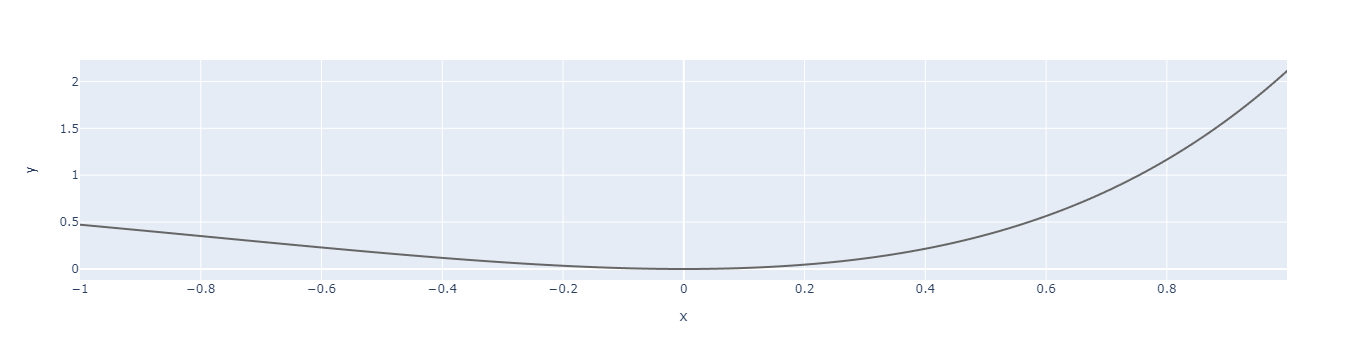

In [13]:
x = np.arange(-1, 1, 0.001)
y = teste_cp(1, 0.001)[3:-3]

df = pd.DataFrame(
    {
        "x": x,
        "y": y
    }
)
fig = ply_exp.line(
    data_frame = df,
    x          = x ,
    y          = y ,
    color_discrete_sequence = ["#666666"]
)
fig.show()
fig.update_yaxes(exponentformat="power")
fig.write_html("htmls\Função com Ponto Crítico de Ordem 1.html")